In [1]:
import os
import scanpy as sc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [2]:
path = '' # Specify path to directory where adata file is located

In [3]:
sc.settings.figdir = path
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=80,
        frameon=True, vector_friendly=True, fontsize=14, figsize=[10,10],
        color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')

In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Parse adata object

In [5]:
adata_file = '' # Specify adata file name
adata = sc.read_h5ad(os.path.join(path, adata_file))

### Statistics

In [6]:
print(f' Number of cells: {adata.n_obs}')
print(f' Number of genes: {adata.n_vars}')

 Number of cells: 385100
 Number of genes: 32721


In [7]:
ct_key = 'celltype_short_with_neutrophils'
print(f' Number of cell types: {len(adata.obs[ct_key].unique())}')

 Number of cell types: 32


In [8]:
gt_key = 'tp53_genotype_wtmut_noTP53clone_wt'
df_stats = adata.obs.groupby(['condition', gt_key], as_index=False, observed=True).apply(len, include_groups=False)
df_stats = df_stats.rename(columns={None:'cells'})

In [9]:
n_cells_gt = int(df_stats[df_stats['condition'].isin(['ERCC6L2 disease','SDS'])]['cells'].sum())
print(f'TP53 genotyped cells (WT or MUT): {n_cells_gt}')

TP53 genotyped cells (WT or MUT): 30894


In [10]:
n_cells_WT = int(df_stats[(df_stats['condition'].isin(['ERCC6L2 disease','SDS'])) & 
                          (df_stats[gt_key].str.endswith('WT'))]['cells'].sum())
print(f'TP53 WT cells: {n_cells_WT}')

TP53 WT cells: 26655


In [11]:
n_cells_MUT = int(df_stats[(df_stats['condition'].isin(['ERCC6L2 disease','SDS'])) & 
                           (df_stats[gt_key].str.endswith('MUT'))]['cells'].sum())
print(f'TP53 WT cells: {n_cells_MUT}')

TP53 WT cells: 4239


In [12]:
gt_key_variant = ['E1a_c.490A>G_scAmp3', 
                  'E1b_c.490A>G_scAmp3', 
                  'E1c_c.490A>G_scAmp3', 
                  'E3_c.524G>A_scAmp3', 
                  'E4a_c.743G>A_scAmp4', 'E4a_c.818G>A_scAmp5_scAmp5_II', 'E4a_c.814G>A_scAmp5_scAmp5_II', 
                  'E4b_c.743G>A_scAmp4', 'E4b_c.818G>A_scAmp5_scAmp5_II', 'E4b_c.814G>A_scAmp5_scAmp5_II', 'E4b_c.41T>C_scAmp1', 
                  'E4c_c.743G>A_scAmp4', 'E4c_c.818G>A_scAmp5_scAmp5_II', 'E4c_c.814G>A_scAmp5_scAmp5_II', 'E4c_c.41T>C_scAmp1',
                  'E5_c.743G>A_scAmp4', 'E5_c.830G>T_scAmp5_scAmp5_II', 'E5_c.528C>G_scAmp3', 'E5_c.843C>A_scAmp5_scAmp5_II', 
                  'E6_c.723delC_scAmp4', 'E6_c.733G>A_scAmp4', 
                  'E7_c.659A>G_scAmp4', 'E7_c.716A>G_scAmp4', 
                  'E8a_c.659A>G_scAmp4', 'E8a_c.725G>T_scAmp4', 
                  'E8b_c.659A>G_scAmp4', 'E8b_c.725G>T_scAmp4', 'E8b_c.764T>G_scAmp4_scAmp5', 'E8b_c.795_796insCCTCTTGCT_scAmp5_scAmp5_II', 
                  'E8c_c.659A>G_scAmp4', 'E8c_c.725G>T_scAmp4', 'E8c_c.764T>G_scAmp4_scAmp5', 'E8c_c.795_796insCCTCTTGCT_scAmp5_scAmp5_II', 
                  'E9_c.713G>A_scAmp4', 
                  'E10_c.817C>T_scAmp5_scAmp5_II', 
                  'SDS3_c.524G>A_scAmp3', 
                  'SDS4_c.329G>C_scAmp2', 'SDS4_c.818G>A_scAmp5_scAmp5_II', 'SDS4_c.833C>T_scAmp5_scAmp5_II', 
                  'SDS5a_c.713G>C_scAmp4', 
                  'SDS5b_c.713G>C_scAmp4']

In [13]:
df_cells = adata.obs.groupby(['sample'], as_index=False, observed=True).apply(len, include_groups=False)
df_cells = df_cells.rename(columns={None:'cells'})

In [14]:
percents = []
first=True
for variant in gt_key_variant:
    sample = variant.split('_')[0]
    variant_short = variant.split('_')[1]
    n_cells = df_cells[df_cells['sample']==sample]['cells'].to_list()[0]
    df_variant = adata.obs.groupby(['sample', variant], as_index=False, observed=True).apply(len, include_groups=False)
    df_variant = df_variant.rename(columns={None:'TP53 genotyped cells'})
    n_cells_gt = df_variant['TP53 genotyped cells'][0]#.sum()[0]
    fraction = n_cells_gt/n_cells
    percent = 100*n_cells_gt/n_cells
    percents.append(percent)
    print(f'{sample} {variant_short} {n_cells_gt} {n_cells} {percent:.2f}%')

E1a c.490A>G 68 1866 3.64%
E1b c.490A>G 298 2111 14.12%
E1c c.490A>G 1058 2804 37.73%
E3 c.524G>A 87 1859 4.68%
E4a c.743G>A 437 5067 8.62%
E4a c.818G>A 23 5067 0.45%
E4a c.814G>A 2101 5067 41.46%
E4b c.743G>A 72 3497 2.06%
E4b c.818G>A 46 3497 1.32%
E4b c.814G>A 1107 3497 31.66%
E4b c.41T>C 83 3497 2.37%
E4c c.743G>A 1513 2850 53.09%
E4c c.818G>A 1726 2850 60.56%
E4c c.814G>A 1 2850 0.04%
E4c c.41T>C 1648 2850 57.82%
E5 c.743G>A 2 3078 0.06%
E5 c.830G>T 17 3078 0.55%
E5 c.528C>G 98 3078 3.18%
E5 c.843C>A 1 3078 0.03%
E6 c.723delC 64 3411 1.88%
E6 c.733G>A 16 3411 0.47%
E7 c.659A>G 1017 1710 59.47%
E7 c.716A>G 457 1710 26.73%
E8a c.659A>G 6 4030 0.15%
E8a c.725G>T 349 4030 8.66%
E8b c.659A>G 28 3979 0.70%
E8b c.725G>T 620 3979 15.58%
E8b c.764T>G 20 3979 0.50%
E8b c.795 1807 3979 45.41%
E8c c.659A>G 1686 3781 44.59%
E8c c.725G>T 1039 3781 27.48%
E8c c.764T>G 1038 3781 27.45%
E8c c.795 58 3781 1.53%
E9 c.713G>A 65 4073 1.60%
E10 c.817C>T 608 6636 9.16%
SDS3 c.524G>A 1569 5159 30.41%
SDS

In [15]:
percents.sort()
print(f'Minimum percentage of genotyped cells: {percents[0]}')
print(f'Maximum percentage of genotyped cells: {percents[len(percents)-1]}')

Minimum percentage of genotyped cells: 0.03248862897985705
Maximum percentage of genotyped cells: 60.56140350877193


### Pie charts for single-cell

In [16]:
# HD green (1st color), ED orange (2nd color), SDS violet (3rd color), AML red (4th color)
R_color_brewer_palette_Set2 = ["#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3"]
#R_color_brewer_palette_Dark2 = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A"]
color = R_color_brewer_palette_Set2[2]
#color = R_color_brewer_palette_Dark2[2]
#text = 'text'
#display (Markdown('<span style="color: '+color+'">'+text+'</span>'))

In [17]:
colors = [R_color_brewer_palette_Set2[2], # SDS
          R_color_brewer_palette_Set2[1], # ED
          R_color_brewer_palette_Set2[3], # AML
          R_color_brewer_palette_Set2[0]] # HD

In [18]:
df_stats_samples = adata.obs.groupby(['sample'], as_index=False, observed=False).apply(len, include_groups=False)
n_samples_E = len(df_stats_samples[df_stats_samples['sample'].str.startswith('E')])
n_samples_SDS = len(df_stats_samples[df_stats_samples['sample'].str.startswith('SDS')])
n_samples_AML = len(df_stats_samples[df_stats_samples['sample'].str.startswith('AML')])
n_samples_HD = len(df_stats_samples[df_stats_samples['sample'].str.startswith('HCA')])
data = [['ED', n_samples_E], ['SDS', n_samples_SDS], ['HC', n_samples_HD], ['AML', n_samples_AML]]
df_n_samples = pd.DataFrame(data, columns=['condition','samples'])
df_n_samples = df_n_samples.sort_values(by=['samples'], ascending=True).set_index('condition')

In [19]:
df_n_samples

,samples
condition,
SDS,6
ED,16
AML,21
HC,63


In [20]:
def absolute_value(val):
    sizes=np.array(df_n_samples.samples)
    a = np.round(val/100.*sizes.sum(), 0)
    return 'n='+str(int(a))

In [21]:
fontsize_small=24
fontsize_large=40

Text(0, 0.5, '')

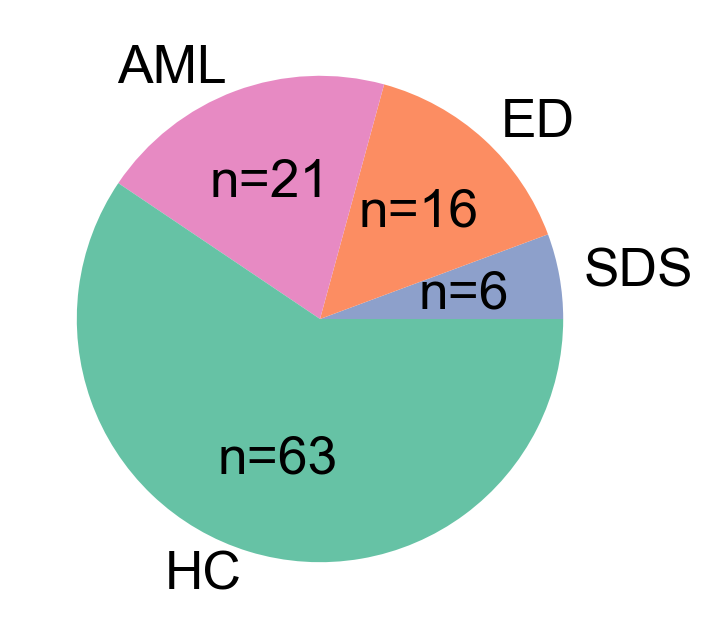

In [22]:
ax = df_n_samples.plot(kind='pie', 
                       y='samples', 
                       autopct=absolute_value, 
                       colors=colors, 
                       textprops={'fontsize': fontsize_small})
ax.get_legend().remove()
ax.set_ylabel('')

### Pie charts for bulk

In [23]:
colors_blood = [R_color_brewer_palette_Set2[2], # SDS
                R_color_brewer_palette_Set2[0], # HD
                R_color_brewer_palette_Set2[1]] # ED

In [24]:
colors_fibroblast = [R_color_brewer_palette_Set2[0], # HD
                     R_color_brewer_palette_Set2[2], # SDS
                     R_color_brewer_palette_Set2[1]] # ED

In [25]:
data_blood = {'condition':['ED', 'SDS', 'HC'], 'samples':[28, 7, 11]}
data_fibroblast = {'condition':['ED', 'SDS', 'HC'], 'samples':[74, 55, 68]}
df_n_samples_blood = pd.DataFrame(data_blood)
df_n_samples_fibroblast = pd.DataFrame(data_fibroblast)
df_n_samples_blood = df_n_samples_blood.sort_values(by=['samples'], ascending=True).set_index('condition')
df_n_samples_fibroblast = df_n_samples_fibroblast.sort_values(by=['samples'], ascending=True).set_index('condition')

In [26]:
sizes_blood = np.array(df_n_samples_blood.samples)
sizes_fibroblast = np.array(df_n_samples_fibroblast.samples)

In [27]:
def absolute_value_blood(val):
    a = np.round(val/100.*sizes_blood.sum(), 0)
    return 'n='+str(int(a))

In [28]:
def absolute_value_fibroblast(val):
    a = np.round(val/100.*sizes_fibroblast.sum(), 0)
    return 'n='+str(int(a))

In [29]:
fontsize_small=24
fontsize_large=40

Text(0, 0.5, '')

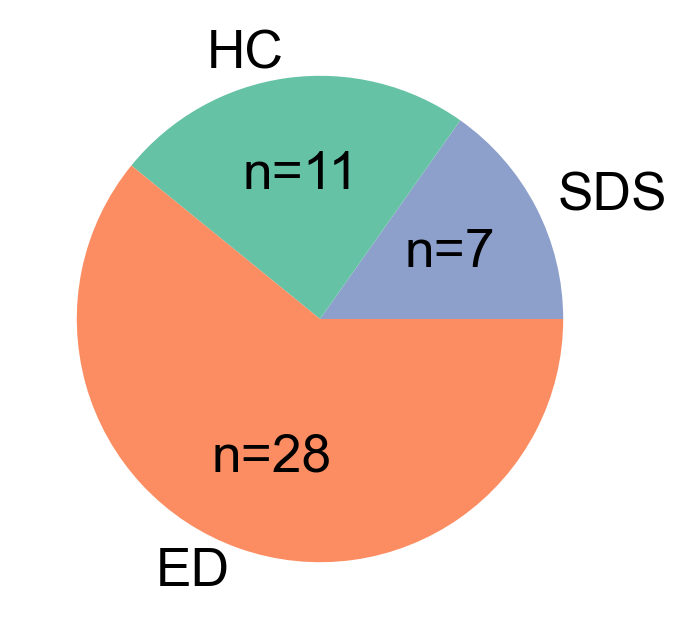

In [30]:
ax = df_n_samples_blood.plot(kind='pie',
                             y='samples', 
                             autopct=absolute_value_blood, 
                             colors=colors_blood, 
                             textprops={'fontsize': fontsize_small})
ax.get_legend().remove()
ax.set_ylabel('')

Text(0, 0.5, '')

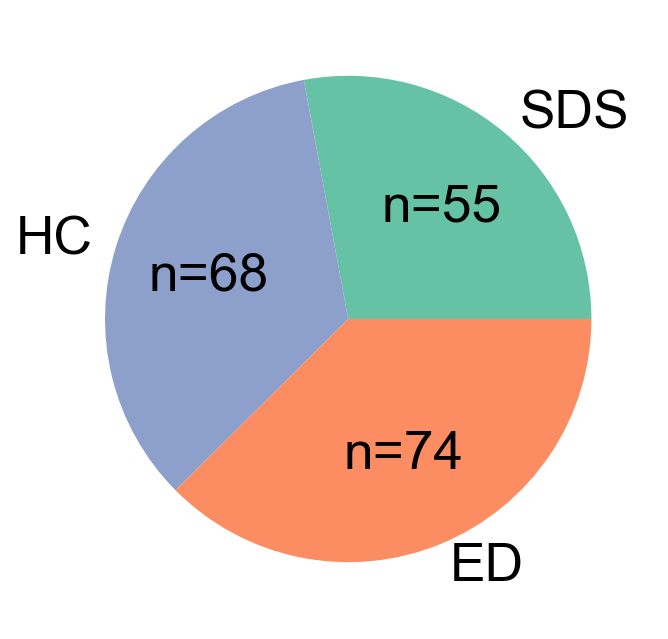

In [31]:
ax = df_n_samples_fibroblast.plot(kind='pie', 
                                  y='samples', 
                                  autopct=absolute_value_fibroblast, 
                                  colors=colors_fibroblast, 
                                  textprops={'fontsize': fontsize_small})
ax.get_legend().remove()
ax.set_ylabel('')